In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from collections import defaultdict

In [5]:
dataset_df =pd.DataFrame()

day_lst = ["20170417", "20170418", "20170420", "20170421", "20170422"]

for day in day_lst:
    for t_idx in range(9, 17):
        tmp_dataset_df = pd.read_csv("../../data/datasets/{0}/default/time_series_{1}.csv".format(day, t_idx))

        # check NaN count
        assert tmp_dataset_df.isnull().values.sum() == 0

        dataset_df = pd.concat([dataset_df, tmp_dataset_df])

    # shuffle dataset
    dataset_df = dataset_df.sample(frac=1)
    dataset_df = dataset_df.fillna(0)

    # check NaN count
    assert dataset_df.isnull().values.sum() == 0
    
    
dataset_df.head()

,Fri,Mon,Sat,Sun,Thurs,Tue,Wed,area_ratio,degree_mean,degree_mean_shift1,...,overall_dir_left_up,overall_dir_right,overall_dir_right_down,overall_dir_right_up,right,right_down,right_up,up,var,var_shift1
3141,0,0,1,0,0,0,0,0.232676,130.500000,-3.833333,...,0,1,0,0,0.285714,0.107143,0.107143,0.0,48.4678,-3.3479
3372,0,0,0,0,0,1,0,0.062614,129.612903,-25.174976,...,0,1,0,0,0.387097,0.032258,0.064516,0.0,33.4345,8.4337
578,1,0,0,0,0,0,0,0.022696,165.777778,65.444444,...,1,0,0,0,0.333333,0.000000,0.000000,0.0,59.3995,9.4678
1374,1,0,0,0,0,0,0,0.008876,94.680000,1.718462,...,0,1,0,0,0.480000,0.080000,0.080000,0.0,54.9076,-12.2178
1674,1,0,0,0,0,0,0,0.140818,124.148148,-29.206691,...,0,0,0,0,0.259259,0.037037,0.000000,0.0,24.7558,-0.2633


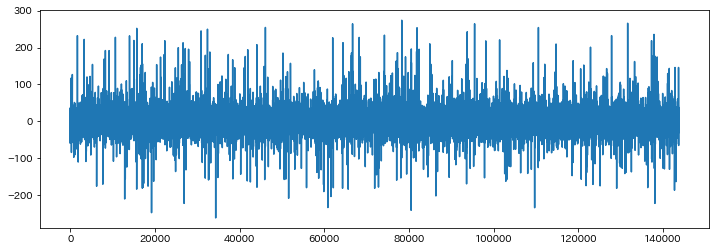

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(np.array(dataset_df["max_shift1"]))

In [7]:
dataset_df.columns

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tue', 'Wed', 'area_ratio',
       'degree_mean', 'degree_mean_shift1', 'degree_std', 'degree_std_shift1',
       'diver', 'down', 'feed', 'grid_0_0', 'grid_0_1', 'grid_0_2', 'grid_0_3',
       'grid_0_4', 'grid_0_5', 'grid_0_6', 'grid_0_7', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_9',
       'label', 'left', 'left_down', 'left_up', 'max', 'max_index_grid_0_0',
       'max_index_grid_0_1', 'max_index_grid_0_2', 'max_index_grid_0_3',
       'max_index_grid_0_4', 'max_index_grid_0_5', 'max_index_grid_0_6',
       'max_index_grid_0_7', 'max_shift1', 'mean', 'mean_shift1',
       'overall_dir_down', 'overall_dir_left', 'overall_dir_left_down',
       'overall_dir_left_up', 'overall_dir_right', 'overall_dir_right_down',
       'overall_dir_right_up', 'right', 'right_down', 'right_up', 'up', 'var',
       'var_shift1'],
      dtype='object')

In [8]:
# check data balance, and convert numpy
y_train = dataset_df["label"].values
print("***************** Train *****************")
print("Normal: {}".format(np.sum(y_train==0)))
print("Anormal: {}".format(np.sum(y_train==1)))
print("Anormaly rate [%]: {}".format(100*(np.sum(y_train==1)/np.sum(y_train==0))))

dataset_df = dataset_df.drop(["label"], axis=1)
X_train = dataset_df.values

***************** Train *****************
Normal: 143400
Anormal: 339
Anormaly rate [%]: 0.23640167364016737


In [29]:
test_df = pd.DataFrame(columns=dataset_df.columns)

for t_idx in range(9, 17):
    tmp_test_df = pd.read_csv("../../data/datasets/20170416/default/time_series_{0}.csv".format(t_idx))

    # check NaN count
    assert tmp_test_df.isnull().values.sum() == 0

    test_df = pd.concat([test_df, tmp_test_df])


test_df = test_df.fillna(0)

# check NaN count
assert test_df.isnull().values.sum() == 0
    
# check data balance, and convert numpy
y_test = test_df["label"].values
print("***************** Test *****************")
print("Normal: {}".format(np.sum(y_test==0)))
print("Anormal: {}".format(np.sum(y_test==1)))
print("Anormaly rate [%]: {}".format(100*(np.sum(y_test==1)/np.sum(y_test==0))))

#test_df = test_df.drop(["label", "max"], axis=1)
test_df = test_df.drop("label", axis=1)
X_test = test_df.values

***************** Test *****************
Normal: 28684
Anormal: 62
Anormaly rate [%]: 0.21614837540092036


In [39]:
clf = LogisticRegression(random_state=0, solver="lbfgs", multi_class="multinomial", class_weight="balanced")
#clf = LogisticRegression(random_state=0, class_weight="balanced")
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [40]:
train_pred = clf.predict_proba(X_train)[:, 1]
train_pred[train_pred <= 0.5] = 0
train_pred[train_pred > 0.5] = 1
test_pred = clf.predict_proba(X_test)[:, 1]
test_pred[test_pred <= 0.5] = 0
test_pred[test_pred > 0.5] = 1

train_acc = accuracy_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

test_acc = accuracy_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

print("*********************************************")
print("Train Accuracy: {}".format(train_acc))
print("Train Recall: {}".format(train_recall))
print("Train Precision: {}".format(train_precision))
print("*********************************************")

print("*********************************************")
print("Test Accuracy: {}".format(test_acc))
print("Test Recall: {}".format(test_recall))
print("Test Precision: {}".format(test_precision))
print("*********************************************")

*********************************************
Train Accuracy: 0.9962153625668747
Train Recall: 1.0
Train Precision: 0.38391845979614947
*********************************************
*********************************************
Test Accuracy: 0.9955124191191818
Test Recall: 1.0
Test Precision: 0.32460732984293195
*********************************************


### default  
*********************************************  
Train Accuracy: 0.9640137156847062  
Train Recall: 0.9523052464228935  
Train Precision: 0.104300888037611  
*********************************************  
*********************************************  
Test Accuracy: 0.9522534427597719  
Test Recall: 0.9787234042553191  
Test Precision: 0.09151193633952255  
*********************************************  

### normalize
*********************************************  
Train Accuracy: 0.8706121285045592  
Train Recall: 0.8505564387917329  
Train Precision: 0.02809283763915144  
*********************************************  
*********************************************  
Test Accuracy: 0.9157393239671721  
Test Recall: 0.9361702127659575  
Test Precision: 0.051846032992930086  
*********************************************  

In [41]:
test_pred = clf.predict_proba(X_test)[:, 1]

In [42]:
test_pred

array([0.37072825, 0.03770133, 0.03013391, ..., 0.00453175, 0.00583089,
       0.00276926])

In [43]:
test_pred = np.array(test_pred*10, dtype=int)
test_pred = np.array(test_pred/10, dtype=float)
np.unique(test_pred)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [44]:
true_dct = defaultdict(int)
false_dct = defaultdict(int)
label_cnt = defaultdict(int)

for i in range(len(test_pred)):
    label_cnt[test_pred[i]] += 1
    if y_test[i] > 0:
        true_dct[test_pred[i]] += 1
    else:
        false_dct[test_pred[i]] += 1
        
for key in false_dct.keys():
    true_dct[key] /= label_cnt[key]
    false_dct[key] /= label_cnt[key]

In [45]:
true_dct

defaultdict(int,
            {0.0: 0.0,
             0.1: 0.0,
             0.2: 0.0,
             0.3: 0.0,
             0.4: 0.0,
             0.5: 0.029411764705882353,
             0.6: 0.043478260869565216,
             0.7: 0.0,
             0.8: 0.0,
             0.9: 0.6382978723404256})

In [46]:
false_dct

defaultdict(int,
            {0.0: 1.0,
             0.1: 1.0,
             0.2: 1.0,
             0.3: 1.0,
             0.4: 1.0,
             0.5: 0.9705882352941176,
             0.6: 0.9565217391304348,
             0.7: 1.0,
             0.8: 1.0,
             0.9: 0.3617021276595745})

<Container object of 10 artists>

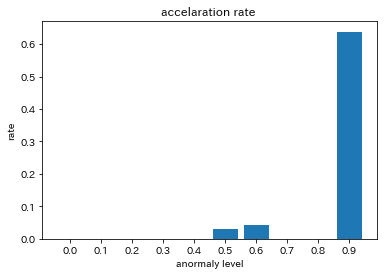

In [47]:
value_lst = []
name_lst = []

for k, v in sorted(true_dct.items()):
    value_lst.append(v)
    name_lst.append(k)
    

plt.title("accelaration rate ")
plt.xlabel("anormaly level")
plt.ylabel("rate")
plt.bar(range(len(true_dct)), value_lst, tick_label=name_lst)

<Container object of 10 artists>

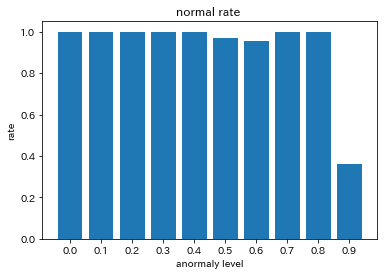

In [48]:
value_lst = []
name_lst = []

for k, v in sorted(false_dct.items()):
    value_lst.append(v)
    name_lst.append(k)

plt.title("normal rate ")
plt.xlabel("anormaly level")
plt.ylabel("rate")
plt.bar(range(len(false_dct)), value_lst, tick_label=name_lst)

In [49]:
coef_dict = {}
for value, col in zip(clf.coef_[0,:], dataset_df.columns):
    coef_dict[col] = value
    
for key, value in sorted(coef_dict.items(), key=lambda x: -abs(x[1])):
    print("{} : {}".format(key, value))

hour_14 : -3.09646372675215
hour_9 : 2.3121546812667453
Fri : -1.3090251810929372
hour_13 : -1.092666396765371
max_index_grid_0_4 : -1.0747382472184135
overall_dir_right : 0.980113186228253
overall_dir_right_down : -0.9429972348422547
Thurs : 0.7325938948797159
feed : -0.7281367353212991
Mon : 0.64958257708688
hour_10 : 0.6237723037243703
overall_dir_left : -0.5468572736094032
Sat : -0.5127345649568801
Tue : -0.4710888505745394
right_down : -0.4334291530679995
hour_16 : 0.43095498153313305
max_index_grid_0_1 : 0.3840158443939193
right_up : 0.3818101564051315
area_ratio : -0.3631194023428734
grid_0_4 : -0.33239396542706606
overall_dir_left_up : -0.331191744089736
max_index_grid_0_3 : -0.32759370466836996
left_up : -0.32508366259553423
hour_12 : -0.2966059559609923
left_down : -0.26916679239035796
left : -0.2644512009003853
hour_15 : 0.26044901456351804
grid_0_3 : -0.2195613944492501
max_index_grid_0_5 : 0.15543688800147348
diver : -0.15418060239376652
grid_0_5 : -0.14398395591002017
gri

# test

In [299]:
def conv_level(pred_arr):
    conv_arr = np.array(pred_arr*10, dtype=int)
    conv_arr = np.array(conv_arr/10, dtype=float)
    return conv_arr

In [328]:
test_df = pd.DataFrame(columns=dataset_df.columns)

for t_idx in range(9, 17):
    tmp_test_df = pd.read_csv("../../data/datasets_10/20170422/time_series_{0}.csv".format(t_idx))

    # check NaN count
    assert tmp_test_df.isnull().values.sum() == 0

    test_df = pd.concat([test_df, tmp_test_df])


test_df = test_df.fillna(0)

# check NaN count
assert test_df.isnull().values.sum() == 0

# drop label
#test_df = test_df.drop("label", axis=1)

test_df.head()

,Fri,Mon,Sat,Sun,Thurs,Tue,Wed,area_ratio,degree_mean,degree_std,...,overall_dir_left_down,overall_dir_left_up,overall_dir_right,overall_dir_right_down,overall_dir_right_up,right,right_down,right_up,up,var
0,0,0,1,0,0,0,0,0.000030,149.783784,119.499663,...,0,0,1,0,0,0.297297,0.054054,0.189189,0.027027,0.0000
1,0,0,1,0,0,0,0,0.000045,121.428571,116.511422,...,0,0,1,0,0,0.357143,0.119048,0.095238,0.000000,19.7564
2,0,0,1,0,0,0,0,0.000000,106.333333,124.348301,...,0,0,1,0,0,0.472222,0.083333,0.111111,0.027778,23.1904
3,0,0,1,0,0,0,0,0.000045,111.000000,140.305549,...,0,0,1,0,0,0.500000,0.088235,0.205882,0.000000,20.9167
4,0,0,1,0,0,0,0,0.000000,86.454545,129.904415,...,0,0,1,0,0,0.666667,0.060606,0.090909,0.000000,21.9560


In [329]:
test_data = test_df.drop("label", axis=1).values
test_data.shape

(28756, 47)

In [330]:
conv_arr = conv_level(clf.predict_proba(test_data)[:, 1])
test_df["pred"] = conv_arr

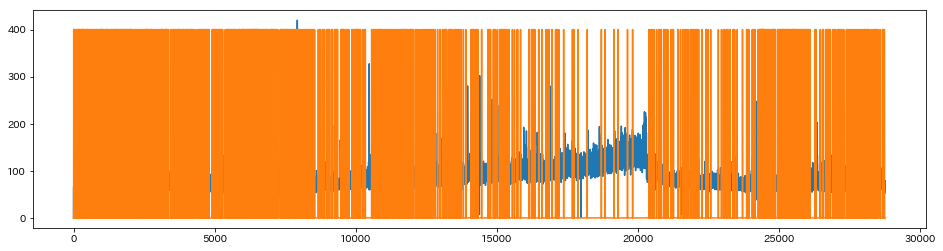

In [331]:
plt.figure(figsize=(16, 4))
plt.plot(np.array(test_df["max"]))
plt.plot(test_pred*400)

In [332]:
test_pred = clf.predict_proba(test_data)[:, 1]
test_pred[test_pred <= 0.5] = 0
test_pred[test_pred > 0.5] = 1

print("Accuracy: {}".format(accuracy_score(test_df["label"].values, test_pred)))
print("Recall: {}".format(recall_score(test_df["label"].values, test_pred)))
print("Precision: {}".format(precision_score(test_df["label"].values, test_pred)))

Accuracy: 0.4354221727639449
Recall: 0.8307086614173228
Precision: 0.049920151416573015
